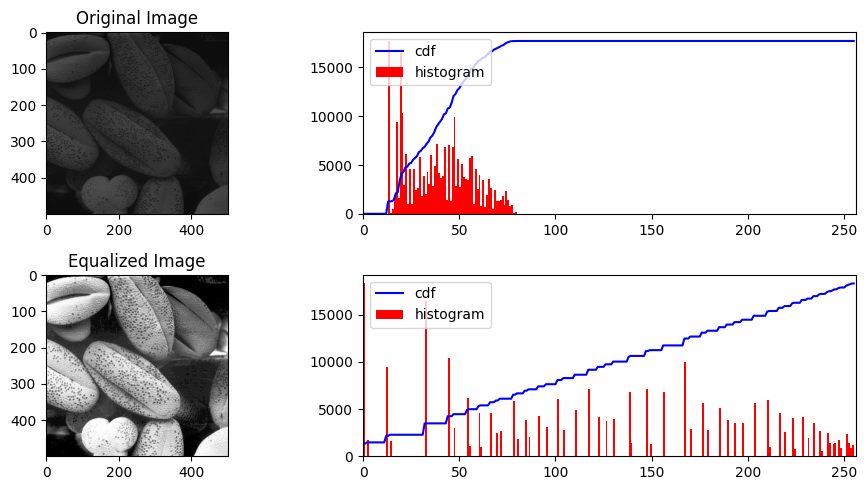

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#Histogram equalization function
def hist_equalization (image):
    hist , bins = np.histogram(image.ravel(),256,[0,256]) #histogram of the image
    cdf = hist.cumsum() #cumulative distribution function

    cdf_m = np.ma.masked_equal(cdf,0) #masking the cdf to ignore the 0 values so that proper scaling is done
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min()) #scaling the cdf to be in the range [0,255]
    cdf = np.ma.filled(cdf_m,0).astype('uint8') #filling the masked cdf with 0
    image2 = cdf[image] #mapping the image with the cdf

    return image2

#Step 1 : Read the image and plot the histogram and normalized cdf
img = cv.imread('shells.tif',0)
hist , bins = np.histogram(img.ravel(),256,[0,256]) 
cdf = hist.cumsum() 
cdf_normalized = cdf * hist.max()/ cdf.max() 

fig, ax = plt.subplots(2,2,figsize=(10,5))
ax[0,0].imshow(cv.cvtColor(cv.imread("shells.tif"), cv.COLOR_BGR2RGB))
ax[0,0].set_title("Original Image")
ax[0,1].plot(cdf_normalized, color = 'b') #plotting the normalized cdf
ax[0,1].hist(img.flatten(),256,[0,256], color = 'r')
ax[0,1].set_xlim([0,256])
ax[0,1].legend(('cdf','histogram'), loc = 'upper left')


#Step 2 : Apply the histogram equalization function
img2 = hist_equalization(img)

#Step 3 : Plot the histogram and normalized cdf of the equalized image
hist2 , bins2 = np.histogram(img2.ravel(),256,[0,256]) #histogram of the image
cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * hist2.max()/ cdf2.max()

ax[1,0].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[1,0].set_title("Equalized Image")
ax[1,1].plot(cdf_normalized2, color = 'b') #plotting the normalized cdf
ax[1,1].hist(img2.flatten(),256,[0,256], color = 'r')
ax[1,1].set_xlim([0,256])
ax[1,1].legend(('cdf','histogram'), loc = 'upper left')

plt.tight_layout()
plt.show()
